In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
clf = DecisionTreeClassifier(max_depth=5,criterion='entropy')
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

1.0


In [ ]:
from sklearn.tree import export_text

In [ ]:
tree_rules = export_text(clf,feature_names=iris.feature_names)
print(tree_rules)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.85
|   |   |   |   |--- class: 2



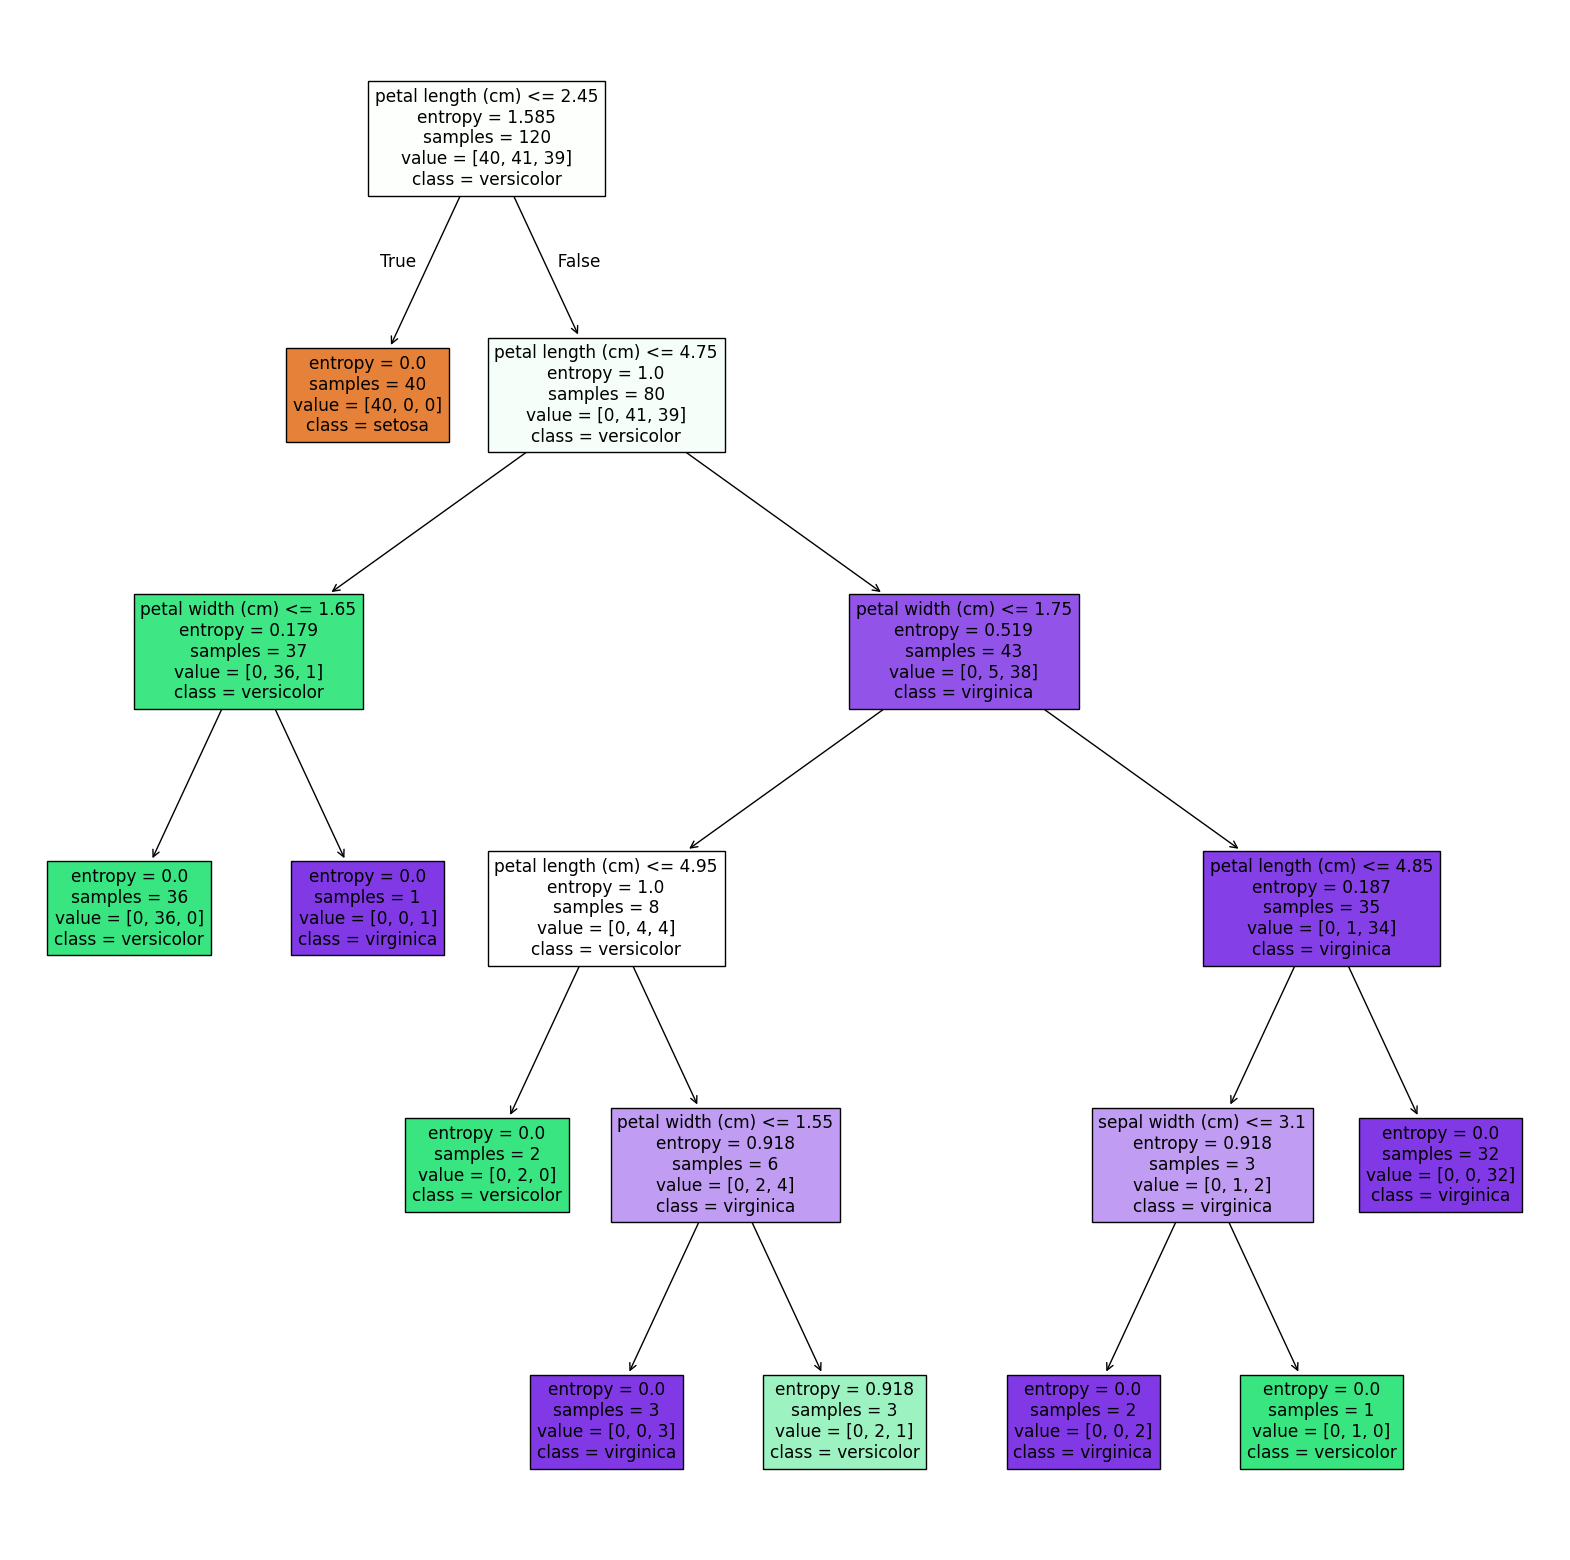

In [ ]:
plt.figure(figsize=(20,20))
tree.plot_tree(clf,filled=True,feature_names=iris.feature_names,class_names=iris.target_names)
plt.show()

In [ ]:
clf.score(X_train,y_train)

0.9916666666666667

In [ ]:
clf.score(X_test,y_test)

1.0

In [ ]:
node_impurities = clf.tree_.impurity

In [ ]:
for i,entropy_calues in enumerate(node_impurities):
  print(f"Entropy for node {i}: {entropy_calues}")

Entropy for node 0: 1.5846619079379884
Entropy for node 1: 0.0
Entropy for node 2: 0.9995491108252484
Entropy for node 3: 0.1792560669283215
Entropy for node 4: 0.0
Entropy for node 5: 0.0
Entropy for node 6: 0.5185697317883058
Entropy for node 7: 1.0
Entropy for node 8: 0.0
Entropy for node 9: 0.9182958340544896
Entropy for node 10: 0.0
Entropy for node 11: 0.9182958340544896
Entropy for node 12: 0.18717625687320816
Entropy for node 13: 0.9182958340544896
Entropy for node 14: 0.0
Entropy for node 15: 0.0
Entropy for node 16: 0.0


In [ ]:
from scipy.stats import entropy
from collections import Counter

In [ ]:
def calculate_entropy(column):
    counts = Counter(column)
    probabilities = [count / len(column) for count in counts.values()]
    entropy_value = entropy(probabilities,base=2)
    return entropy_value

In [ ]:
X = pd.DataFrame(iris.data,columns=iris.feature_names)

In [ ]:
X.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [ ]:
for feature in X.columns:
  column_entropy = calculate_entropy(X[feature])
  print(f"Entropy for {feature}: {column_entropy}")

Entropy for sepal length (cm): 4.822018088381166
Entropy for sepal width (cm): 4.023181025924309
Entropy for petal length (cm): 5.03456995367417
Entropy for petal width (cm): 4.0498270903914175
